# Credit Card Fraud Detection

## About Dataset

### Context

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

### Content

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

## Packages Used

In [57]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from itables import init_notebook_mode

init_notebook_mode(all_interactive=True)
sns.set()
%matplotlib inline

<IPython.core.display.Javascript object>

## Development

### Reading dataset

In [10]:
CURRENT_DIR = os.getcwd()
FILE = os.path.join(CURRENT_DIR, "creditcard.csv")
IS_FILE = os.path.isfile(FILE)

In [11]:
if IS_FILE:
    df = pd.read_csv(FILE)
else:
    raise FileNotFoundError(f"File not found at path {FILE}")

### Exploratory Analisys

#### First Approach to the data

In [37]:
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [12]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [31]:
df.shape

(284807, 31)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

The features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are ‘Time’ and ‘Amount’. Feature ‘Time’ contains the seconds elapsed between each transaction and the first transaction in the dataset

In [28]:
df[[
    'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
    'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
    'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'
]].describe()

V1            V2            V3            V4            V5  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15  9.604066e-16   
std    1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00  1.380247e+00   
min   -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00 -1.137433e+02   
25%   -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01 -6.915971e-01   
50%    1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02 -5.433583e-02   
75%    1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01  6.119264e-01   
max    2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01  3.480167e+01   

                 V6            V7            V8            V9           V10  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15  2.239053e-15   
std    1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00  1.088850e+00   
min   -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01 -2.458826e+01   
25%   -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01 -5.354257e-01   
50%   -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02 -9.291738e-02   
75%    3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01  4.539234e-01   
max    7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01  2.374514e+01   

       ...           V19           V20           V21           V22  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  1.039917e-15  6.406204e-16  1.654067e-16 -3.568593e-16   
std    ...  8.140405e-01  7.709250e-01  7.345240e-01  7.257016e-01   
min    ... -7.213527e+00 -5.449772e+01 -3.483038e+01 -1.093314e+01   
25%    ... -4.562989e-01 -2.117214e-01 -2.283949e-01 -5.423504e-01   
50%    ...  3.734823e-03 -6.248109e-02 -2.945017e-02  6.781943e-03   
75%    ...  4.589494e-01  1.330408e-01  1.863772e-01  5.285536e-01   
max    ...  5.591971e+00  3.942090e+01  2.720284e+01  1.050309e+01   

                V23           V24           V25           V26           V27  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   2.578648e-16  4.473266e-15  5.340915e-16  1.683437e-15 -3.660091e-16   
std    6.244603e-01  6.056471e-01  5.212781e-01  4.822270e-01  4.036325e-01   
min   -4.480774e+01 -2.836627e+00 -1.029540e+01 -2.604551e+00 -2.256568e+01   
25%   -1.618463e-01 -3.545861e-01 -3.171451e-01 -3.269839e-01 -7.083953e-02   
50%   -1.119293e-02  4.097606e-02  1.659350e-02 -5.213911e-02  1.342146e-03   
75%    1.476421e-01  4.395266e-01  3.507156e-01  2.409522e-01  9.104512e-02   
max    2.252841e+01  4.584549e+00  7.519589e+00  3.517346e+00  3.161220e+01   

                V28  
count  2.848070e+05  
mean  -1.227390e-16  
std    3.300833e-01  
min   -1.543008e+01  
25%   -5.295979e-02  
50%    1.124383e-02  
75%    7.827995e-02  
max    3.384781e+01  

[8 rows x 28 columns]

Feature ‘Time’ contains the seconds elapsed between each transaction and the first transaction in the dataset.

The feature ‘Amount’ is the transaction Amount, this feature can be used for example-dependant cost-senstive learning.

In [27]:
df[[ "Time", "Amount" ]].describe()

Time         Amount
count  284807.000000  284807.000000
mean    94813.859575      88.349619
std     47488.145955     250.120109
min         0.000000       0.000000
25%     54201.500000       5.600000
50%     84692.000000      22.000000
75%    139320.500000      77.165000
max    172792.000000   25691.160000

Feature ‘Class’ is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [73]:
value_counts = df["Class"].value_counts()
percentage_nofraud = round(100 * (value_counts[0]/len(df)), 2)
percentage_fraud = round(100 * (value_counts[1]/len(df)), 2)

print(value_counts)
print(f"\nNo fraud: {percentage_nofraud} %\nFraud: {percentage_fraud} %")

Class
0    284315
1       492
Name: count, dtype: int64

No fraud: 99.83 %
Fraud: 0.17 %


That means non balanced dataset

array([[<Axes: title={'center': 'Time'}>, <Axes: title={'center': 'V1'}>,
        <Axes: title={'center': 'V2'}>, <Axes: title={'center': 'V3'}>,
        <Axes: title={'center': 'V4'}>, <Axes: title={'center': 'V5'}>],
       [<Axes: title={'center': 'V6'}>, <Axes: title={'center': 'V7'}>,
        <Axes: title={'center': 'V8'}>, <Axes: title={'center': 'V9'}>,
        <Axes: title={'center': 'V10'}>, <Axes: title={'center': 'V11'}>],
       [<Axes: title={'center': 'V12'}>, <Axes: title={'center': 'V13'}>,
        <Axes: title={'center': 'V14'}>, <Axes: title={'center': 'V15'}>,
        <Axes: title={'center': 'V16'}>, <Axes: title={'center': 'V17'}>],
       [<Axes: title={'center': 'V18'}>, <Axes: title={'center': 'V19'}>,
        <Axes: title={'center': 'V20'}>, <Axes: title={'center': 'V21'}>,
        <Axes: title={'center': 'V22'}>, <Axes: title={'center': 'V23'}>],
       [<Axes: title={'center': 'V24'}>, <Axes: title={'center': 'V25'}>,
        <Axes: title={'center': 'V26'}>, <

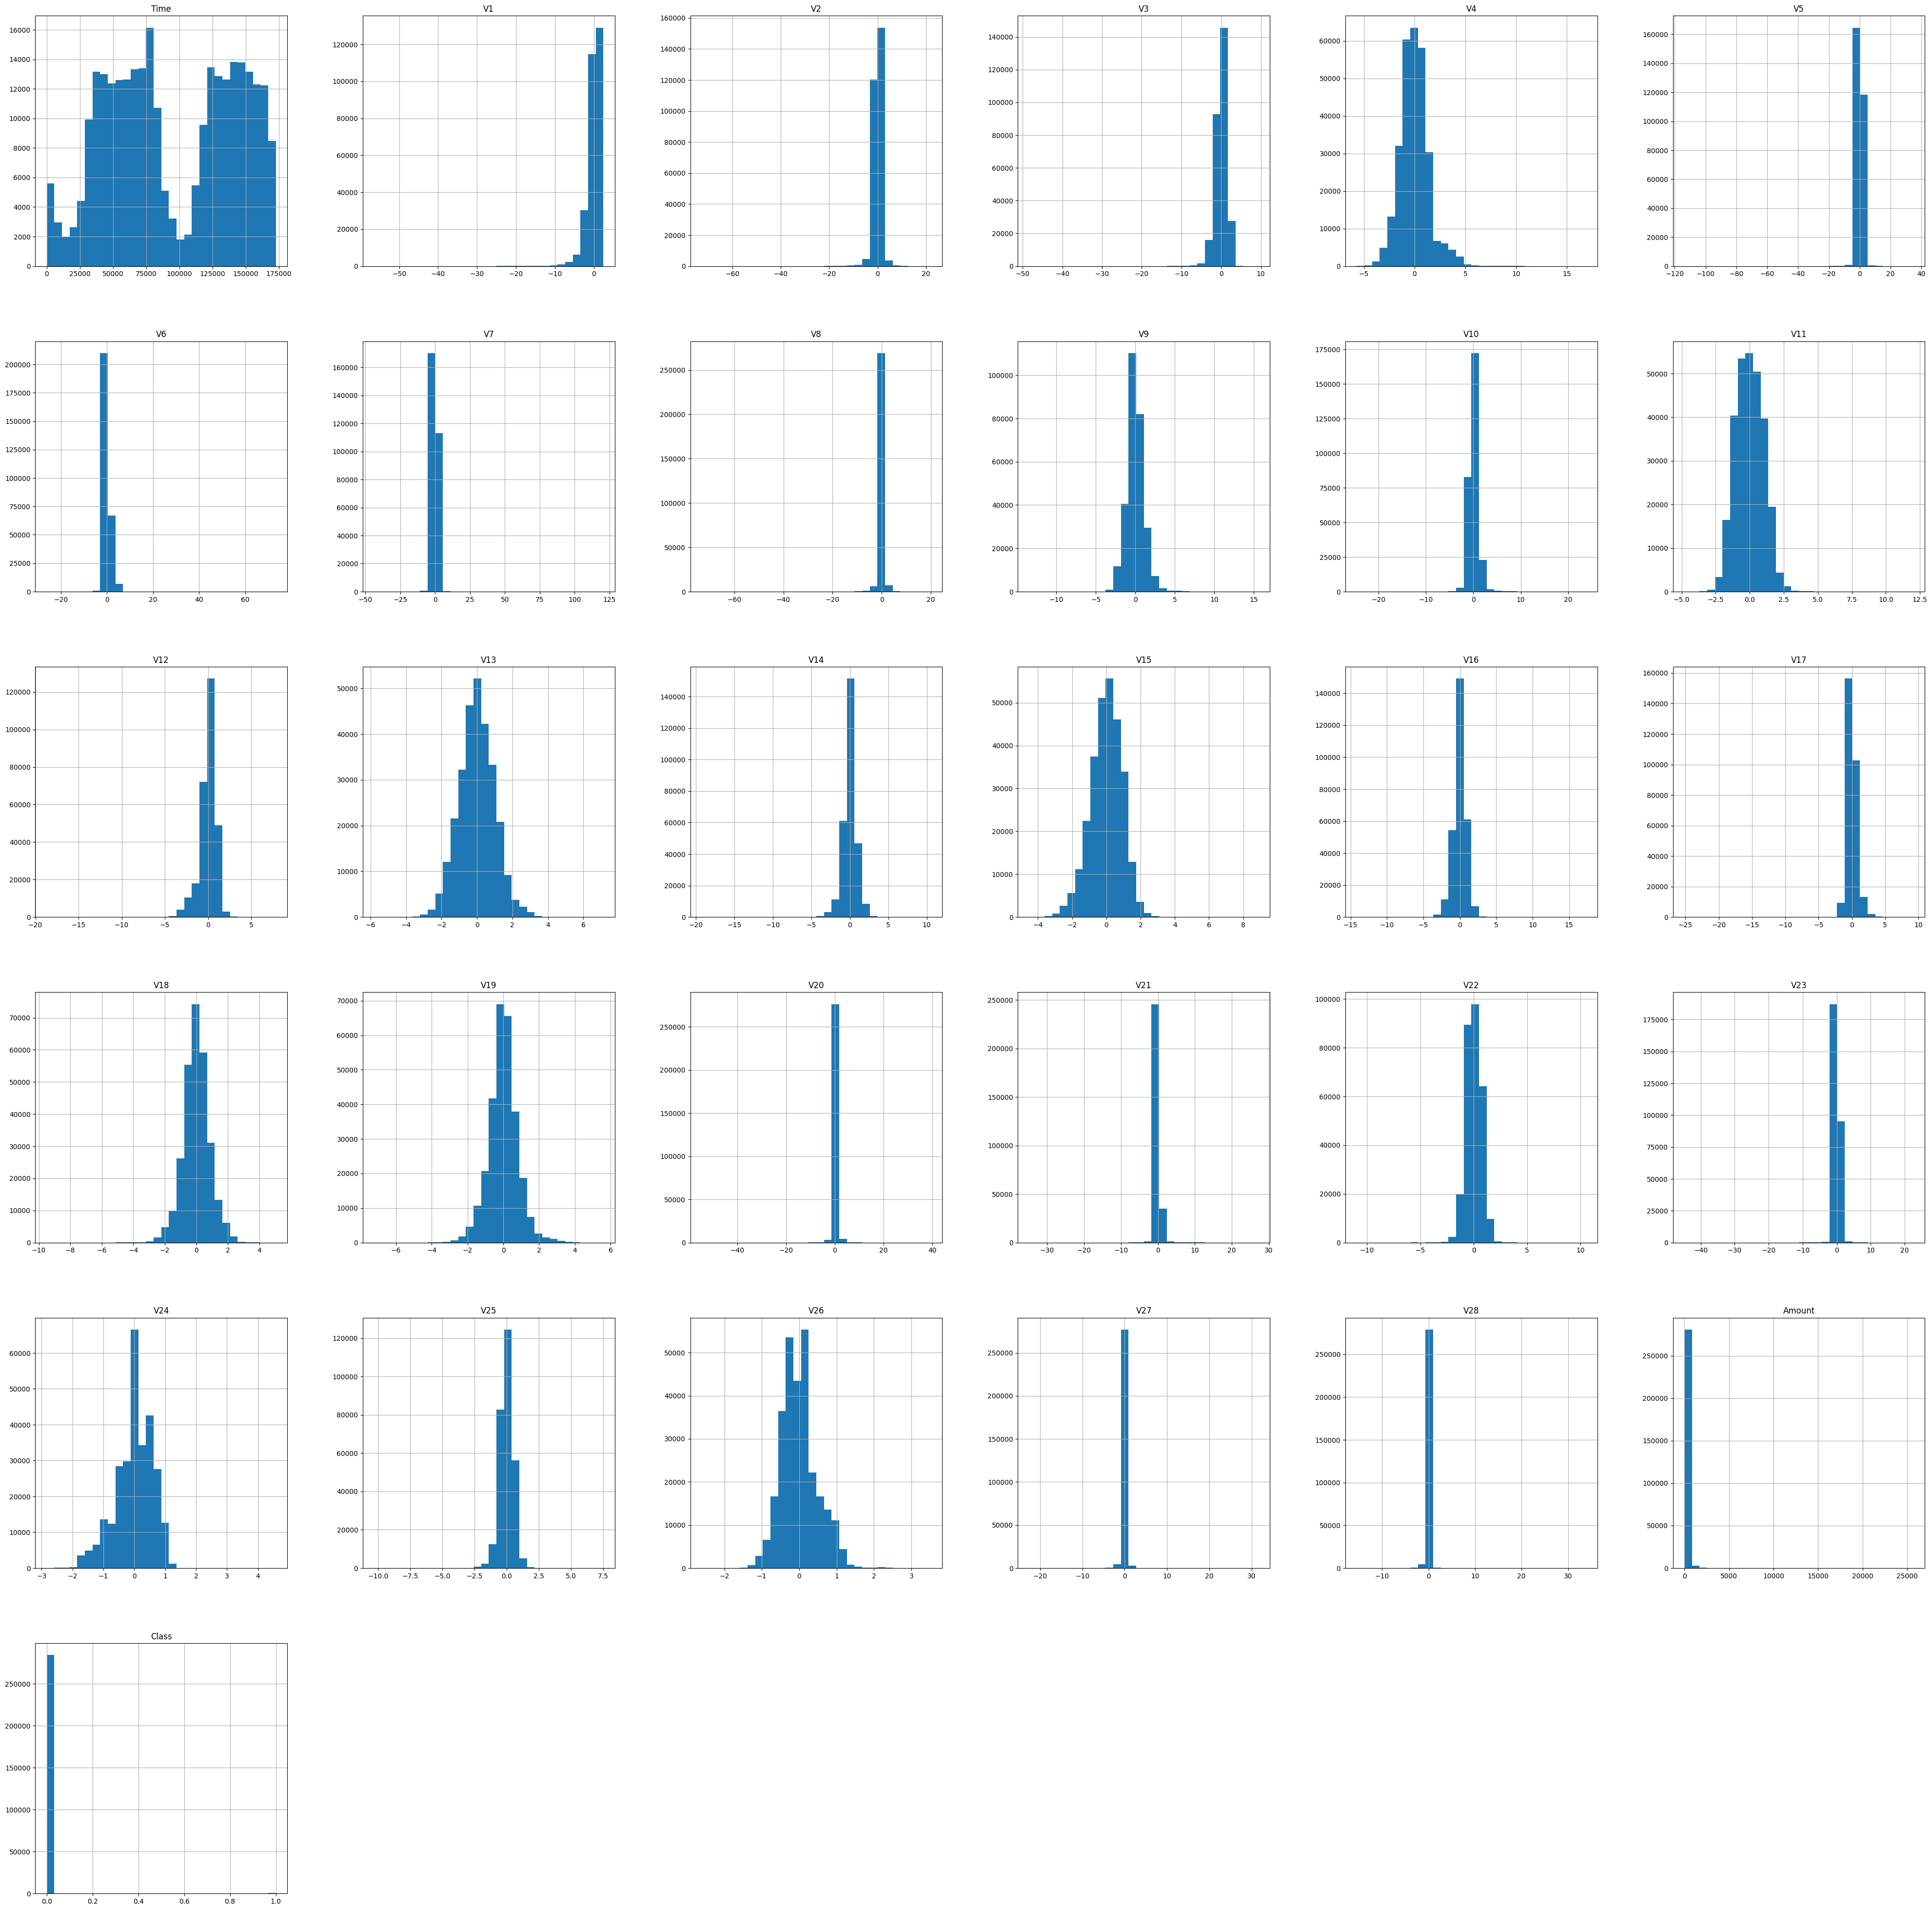

In [22]:
df.hist(bins=30, figsize=(50,50))

#### Any

In [78]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.histplot(data=amount_val, ax=ax[0], kde=True)
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.histplot(data=time_val, ax=ax[1], kde=True)
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

(0.0, 172792.0)